In [1]:
import pandas as pd
import numpy as np
import csv
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

In [2]:
p_info = pd.read_csv('participants_data.csv')

In [50]:
summary = pd.DataFrame()
fatigue = pd.DataFrame()
for i, row in p_info.iterrows():
    if row['pid'] in ['P10', 'P05', 'P03']:
        continue
    
    fatigue_data = pd.read_csv('result/' + row['pid'] + '_fatigue.csv', index_col=0)
    condition_data = pd.read_csv('result/' + row['pid'] + '_' + row['condition'] + '_training.csv', index_col=0)
    ERD_list = []
    ERD_per_list = []
    for day, block in itertools.product(['Day1', 'Day2', 'Day3'], range(5)):
        if row['condition'] == 'continuous':
            file_index = 'FB'
        else:
            file_index = row['condition']
        filename = 'result/' + row['pid'] + '_' + file_index + '_ERSP_' + day + '_b' + str(block) + '.csv'
        
        if os.path.exists(filename) == False:
            continue
        
        with open(filename, 'r') as f:
            data = list(csv.reader(f, quoting=csv.QUOTE_NONNUMERIC))

        for FB in data:
            ERD_list.append(np.average(FB))
            ERD_per_list.append(sum(i < -10 for i in FB) / len(FB))
    condition_data['ERSP'] = ERD_list
    condition_data['Percent'] = ERD_per_list
    
    summary = pd.concat([summary, condition_data])
    fatigue = pd.concat([fatigue, fatigue_data])

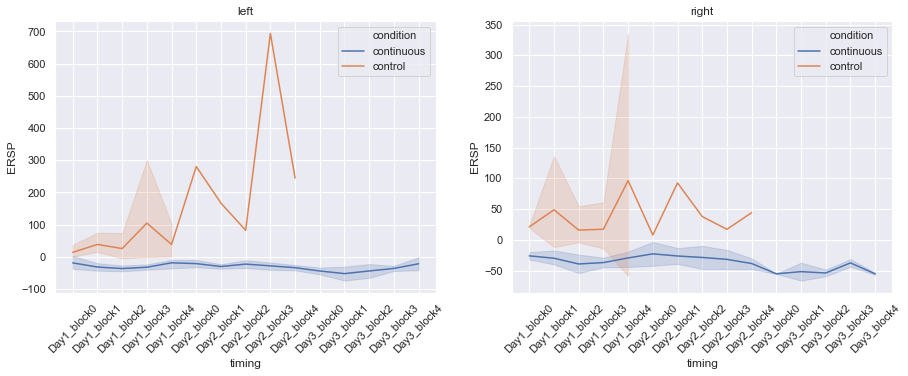

In [51]:
groupby_summary = summary.groupby(['pid', 'condition', 'day', 'block', 'hand'], sort=False, as_index=False).mean()
groupby_summary['timing'] = groupby_summary['day'] + '_block' + [str(n) for n in groupby_summary['block'].values]
plt.figure(figsize=(15,5))
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y='ERSP', hue='condition', data=groupby_summary[groupby_summary.hand == hand])
    plt.title(hand)
    plt.xticks(rotation=45)

In [52]:
fatigue['Percent'] = summary.groupby(['pid', 'condition', 'day', 'block'], sort=False, as_index=False).mean().Percent
fatigue['ERSP'] = summary.groupby(['pid', 'condition', 'day', 'block'], sort=False, as_index=False).mean().ERSP

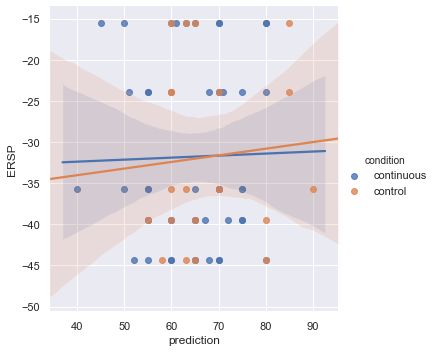

In [53]:
sns.lmplot(x='prediction', y='ERSP', hue='condition', data=fatigue)

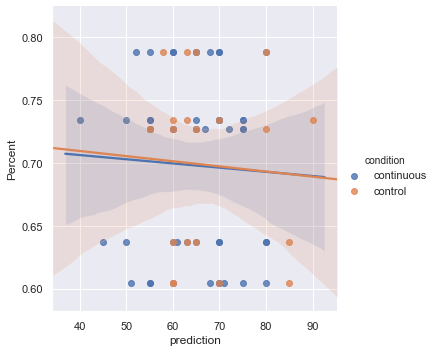

In [54]:
sns.lmplot(x='prediction', y='Percent', hue='condition', data=fatigue)

In [55]:
pid = 'P07'
condition = p_info[p_info.pid == pid].condition.item()
fatigue_data = pd.read_csv('result/' + pid + '_fatigue.csv', index_col=0)
condition_data = pd.read_csv('result/' + pid + '_' + condition + '_training.csv', index_col=0)
ERD_list = []
ERD_per_list = []
for day, block in itertools.product(['Day1', 'Day2', 'Day3'], range(5)):
    if condition == 'continuous':
        file_index = 'FB'
    else:
        file_index = condition
    filename = 'result/' + pid + '_' + file_index + '_ERSP_' + day + '_b' + str(block) + '.csv'

    if os.path.exists(filename) == False:
        continue

    with open(filename, 'r') as f:
        data = list(csv.reader(f, quoting=csv.QUOTE_NONNUMERIC))

    for FB in data:
        ERD_list.append(np.average(FB))
        ERD_per_list.append(sum(i < -10 for i in FB) / len(FB))
condition_data['ERSP'] = ERD_list
condition_data['Percent'] = ERD_per_list

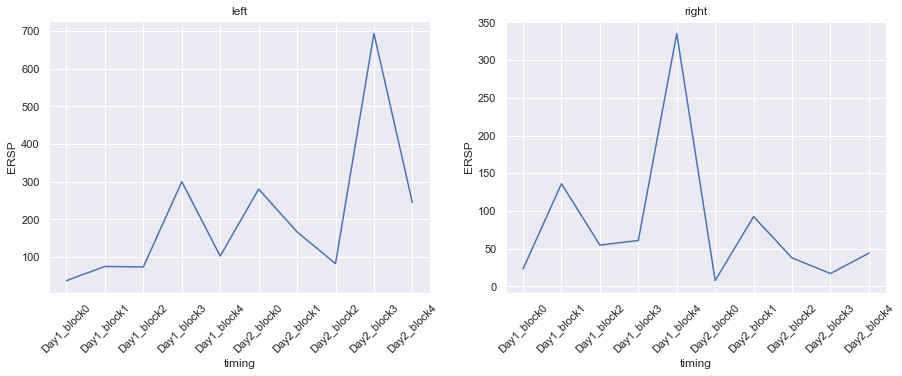

In [56]:
data = condition_data.groupby(['pid', 'condition', 'day', 'block', 'hand'], sort=False, as_index=False).mean()
data['timing'] = data['day'] + '_block' + [str(n) for n in data['block'].values]
plt.figure(figsize=(15,5))
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y='ERSP', data=data[data.hand == hand])
    plt.title(hand)
    plt.xticks(rotation=45)

In [57]:
fatigue_data['Percent'] = condition_data.groupby(['pid', 'condition', 'day', 'block'], sort=False, as_index=False).mean().Percent
fatigue_data['ERSP'] = condition_data.groupby(['pid', 'condition', 'day', 'block'], sort=False, as_index=False).mean().ERSP

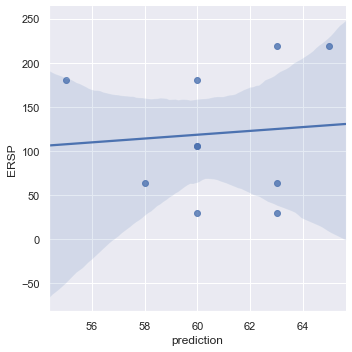

In [58]:
sns.lmplot(x='prediction', y='ERSP', data=fatigue_data)

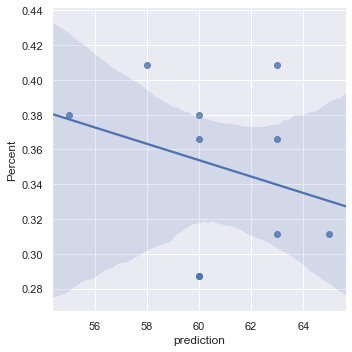

In [59]:
sns.lmplot(x='prediction', y='Percent', data=fatigue_data)